# Nettoyer les données :

La principale difficulté de notre webscrapping était que nous récupérions un fichier json et qu'il y avait ensuite un gros travail de nettoyage des données avant de les comparer à la base ciqual.


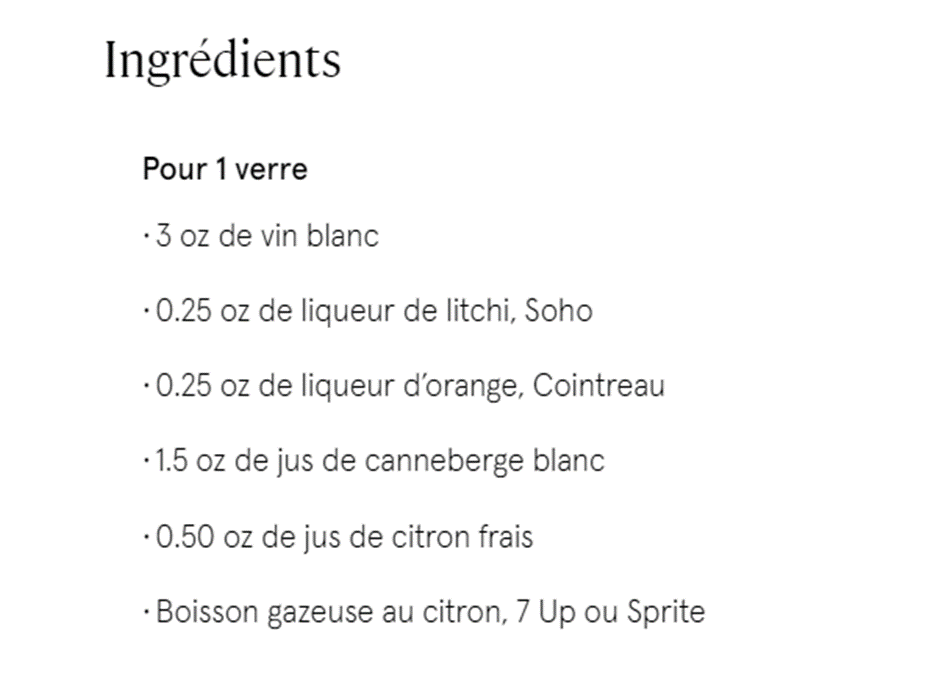{ width=30% }

Par exemple, il y avait beaucoup de noms propres dans les noms de nos alcools (liqueur de litchi, Soho) (ces noms propres viennent sans doute du fait que le site fait des pubs pour certaines marques d'alcool). Nous devions donc simplifier la liste de nos ingrédients : "gin de Palaiseau" et "gin de Paris" doivent devenir "gin"

In [2]:
import pandas as pd
from rapidfuzz import process, fuzz
import re

  

def nettoyer_pour_comparaison(texte):
    # Supprimer les caractères spéciaux et les parenthèses pour la comparaison
    return re.sub(r'[^\w\s]', '', texte)

def supprimer_mot_si_correspondance(ingredient, mots_reference, score_minimum=3):
    modifications = 0
    ingredient_original = ingredient
    for mot in mots_reference:
        # Nettoyer le mot et l'ingrédient pour la comparaison
        mot_nettoyé = nettoyer_pour_comparaison(mot)
        ingredient_nettoyé = nettoyer_pour_comparaison(ingredient)
        meilleur_match = process.extractOne(mot_nettoyé, [ingredient_nettoyé], scorer=fuzz.WRatio)
        if meilleur_match and meilleur_match[1] > score_minimum:
            pattern = re.escape(mot)  # Échapper les caractères spéciaux pour les regex
            ingredient, nombre_substitutions = re.subn(pattern, '', ingredient)
            modifications += nombre_substitutions
    return ingredient.strip(), modifications  # Retourner l'ingrédient nettoyé et le nombre de suppressions

def filtrer_ingredients(fichier_ingredients, fichier_mots_reference, fichier_sortie):
    df_ingredients = pd.read_excel(fichier_ingredients, header=None, names=['Ingredient'])
    df_mots_reference = pd.read_excel(fichier_mots_reference, header=None, names=['Mot'])

    mots_reference = set(df_mots_reference['Mot'].str.lower())

    total_modifications = 0
    # Utiliser items() au lieu de iteritems()
    for i, ingredient in df_ingredients['Ingredient'].items():
        ingredient_nettoyé, modifications = supprimer_mot_si_correspondance(ingredient.lower(), mots_reference)
        df_ingredients.at[i, 'Ingredient'] = ingredient_nettoyé
        total_modifications += modifications

    df_ingredients.to_excel(fichier_sortie, index=False)

    return total_modifications

# Exemple d'utilisation
nombre_modifications = filtrer_ingredients(
    "/home/onyxia/work/Projet-python-2.0/main/test33.xlsx",
    "/home/onyxia/work/Projet-python-2.0/main/qtité.xlsx",
    "/home/onyxia/work/Projet-python-2.0/main/test202.xlsx"
)
print(f"Nombre total de suppressions effectuées : {nombre_modifications}")

Nombre total de suppressions effectuées : 357


In [1]:
print('Hello')

Hello
